In [7]:
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from scipy import stats
import glob
import re
%matplotlib inline

['../WRF_Parameterization\\wrfpost_run_14_2014_d01.nc', '../WRF_Parameterization\\wrfpost_run_26_2014_d01.nc'] ['../WRF_Parameterization\\wrfpost_run_01_2015_d01.nc', '../WRF_Parameterization\\wrfpost_run_13_2015_d01.nc']
rearranging files
['../WRF_Parameterization\\wrfpost_run_14_2014_d01.nc', '../WRF_Parameterization\\wrfpost_run_26_2014_d01.nc'] ['../WRF_Parameterization\\wrfpost_run_01_2015_d01.nc', '../WRF_Parameterization\\wrfpost_run_13_2015_d01.nc']
working on../WRF_Parameterization\wrfpost_run_14_2014_d01.nc ../WRF_Parameterization\wrfpost_run_01_2015_d01.nc


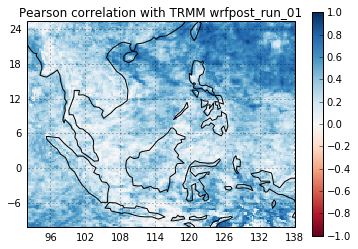

working on../WRF_Parameterization\wrfpost_run_26_2014_d01.nc ../WRF_Parameterization\wrfpost_run_13_2015_d01.nc


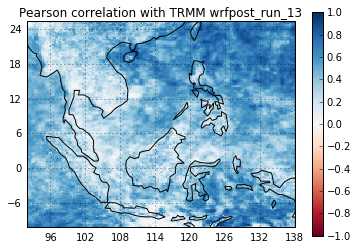

In [11]:
trmm15=xr.open_dataset('../WRF_Parameterization/TRMM_WRFPar2015_Regrid.nc')
trmm14=xr.open_dataset('../WRF_Parameterization/TRMM_WRFPar2014_Regrid.nc')
ti,la,lo=np.shape(trmm14.TRMM)
trmm=np.zeros([184,la,lo])
#collect JJA of both years
trmm[:92,:,:]=trmm14.TRMM[151:243,:,:]
trmm[92:,:,:]=trmm15.TRMM[151:243,:,:]
time,lats,lons=np.shape(trmm)
file_list2014=[]
file_list2015=[]
for name in glob.glob('../WRF_Parameterization/wrfpost_run*_2014_*.nc'):
    file_list2014.append(name)
for name in glob.glob('../WRF_Parameterization/wrfpost_run*_2015_*.nc'):
    file_list2015.append(name)
print(file_list2014,file_list2015)

#rearrange files by number
print('rearranging files')
def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    return [ atoi(c) for c in re.split('(\d+)', text) ]

file_list2014.sort(key=natural_keys)
file_list2015.sort(key=natural_keys)
print(file_list2014,file_list2015)

for fileIndex in range(0,len(file_list2014)):
    print('working on'+file_list2014[fileIndex],file_list2015[fileIndex])
    wrf2014=xr.open_dataset(file_list2014[fileIndex])
    wrf2015=xr.open_dataset(file_list2015[fileIndex])
    gridlat=wrf2014.lat
    gridlon=wrf2014.lon
    ppt2014=wrf2014.PPT
    ppt2015=wrf2015.PPT
    ppt=np.zeros([time,lats,lons])
    ppt[:92,:,:]=ppt2014
    ppt[92:,:,:]=ppt2015
    correlation=np.zeros([lats,lons])
    for i in range(0,lats):
        for j in range(0,lons):
            correlation[i,j],b=stats.pearsonr(ppt[:,i,j],trmm[:,i,j])
    #np.save('correlation_'+str(file_list2015[fileIndex])[24:-12],correlation)
    ax=plt.subplot(projection=ccrs.PlateCarree())
    plt.pcolor(gridlon,gridlat,correlation,cmap='RdBu',vmin=-1,vmax=1)
    ax.coastlines()
    gl=ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True)
    gl.xlabels_top=False
    gl.ylabels_right=False
    plt.title('Pearson correlation with TRMM '+str(file_list2015[fileIndex])[24:-12])
    plt.colorbar()
    #plt.show()
    plt.savefig('../WRF_Parameterization/ppt_combined_corr'+file_list2015[fileIndex][24:-12]+'.png')
    plt.close()

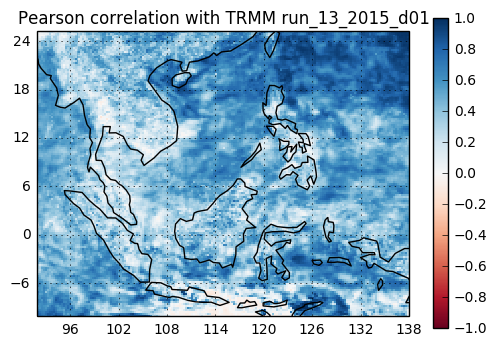

In [60]:
trmm15=xr.open_dataset('./TRMM_WRFPar2015_Regrid.nc')
#trmm14=xr.open_dataset('./TRMM_WRFPar2014_Regrid.nc')
file_list=[]
for name in glob.glob('./wrfpost_run*.nc'):
    file_list.append(name)
for filename in file_list:
    wrf=xr.open_dataset(filename)
    if (int(str(wrf.coords['time'][0].data)[0:4])==2015):
        trmm=trmm15
    elif (int(str(wrf.coords['time'][0].data)[0:4])==2014):
        trmm=trmm14
    gridlat=wrf.lat
    gridlon=wrf.lon
    ppt=wrf.PPT
    mea=trmm.TRMM[151:243,:,:]
    time,lats,lons=np.shape(ppt)
    correlation=np.zeros([lats,lons])
    for i in range(0,lats):
        for j in range(0,lons):
            correlation[i,j],b=stats.pearsonr(ppt[:,i,j],mea[:,i,j])
    ax=plt.subplot(projection=ccrs.PlateCarree())
    plt.pcolor(gridlon,gridlat,correlation,cmap='RdBu',vmin=-1,vmax=1)
    ax.coastlines()
    gl=ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True)
    gl.xlabels_top=False
    gl.ylabels_right=False
    plt.title('Pearson correlation with TRMM '+filename[10:-3])
    plt.colorbar()
    plt.savefig(filename[0:-3]+'.png')

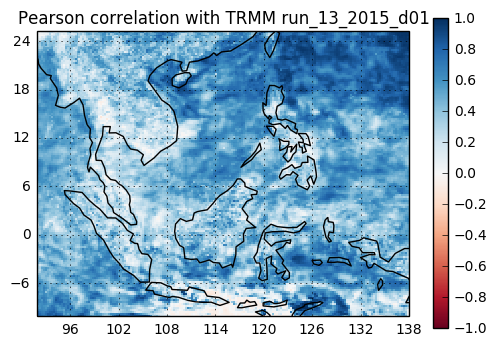

In [65]:
ax=plt.subplot(projection=ccrs.PlateCarree())
plt.pcolor(gridlon,gridlat,correlation,cmap='RdBu',vmin=-1,vmax=1)
ax.coastlines()
gl=ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True)
gl.xlabels_top=False
gl.ylabels_right=False
plt.title('Pearson correlation with TRMM '+filename[10:-3])
plt.colorbar()